# Histogram - Hardpoints Measured Forces

This notebook extracts the minimum and maximum forces measured on each of the six hardpoints on every slew. It, then, produces two plots.  
  
The first plot is a time-series that help us identifying individual slews that might have caused a peak in forces. It plots slewID in the x-axis and the measured forces in the y-axis. 

The second plot shows a histogram of min/max measured forces considering all the hardpoints. It shows the operational and the fatigue limits.

## Parameters

`day_obs`: 
 - type: integer
 - description: A dayobs starts at 12h UTC and ends on 12h UTC the next day.
 - format: YYYYMMDD

`end_reason`: 
 - type: integer
 - description: The [TMAState](https://github.com/lsst-sitcom/summit_utils/blob/60fc4b4507a9fa006cf073b8da34b2139a8b1c93/python/lsst/summit/utils/tmaUtils.py#L1004) at the end of a TMA Event. See the table below for your convenience.
 - enum: 0 STOPPED, 1 TRACKING, 2 SLEWING, 3 FAULT, 4 OFF.

In [9]:
day_obs = 20250719
end_reason = 0

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

from astropy.time import Time
from astropy import units as u
from datetime import datetime

from lsst.summit.utils.blockUtils import BlockParser
from lsst.summit.utils.efdUtils import getDayObsEndTime, getDayObsStartTime, makeEfdClient
from lsst.summit.utils.tmaUtils import TMAEvent, TMAEventMaker, TMAState

from lsst.sitcom.tn092 import query, plot, utils

# Create a client to access the Engineering Facility Database
efd_client = makeEfdClient()

# Create an object that mines TMA Slew Events
event_maker = TMAEventMaker()

In [4]:
day_obs = int(day_obs)
start_time = getDayObsStartTime(day_obs)
end_time = getDayObsEndTime(day_obs)

print(
    f"\nQuery data for {day_obs}"
    f"\n  starts at {start_time.isot} and"
    f"\n  ends at {end_time.isot}\n"
)

events = event_maker.getEvents(day_obs)


Query data for 20250719
  starts at 2025-07-19T12:00:00.000 and
  ends at 2025-07-20T12:00:00.000



In [5]:
df_hp_forces = query.hp_forces_and_azimuth_elevation(efd_client, events)

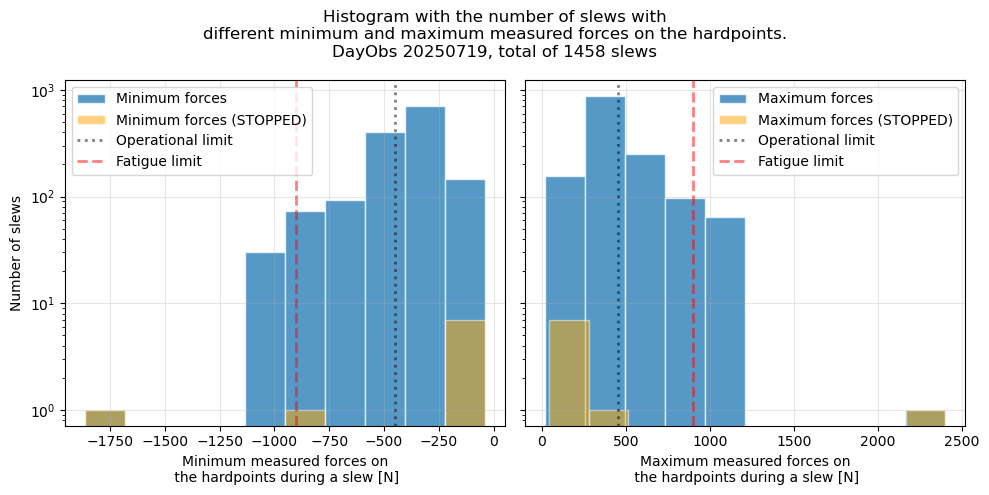

In [10]:
%matplotlib inline 
plot.histogram_hp_minmax_forces(df_hp_forces, day_obs, end_reason=end_reason)